*a*-opic irradiance matching with STLAB
=======================================

This example demonstrates how to find the STLAB settings that match a given spectrum for $a$-opic irradiance. In this particular case, what we are trying to match is the spectral output of the NeurOptics PLR-3000 device, which administers light stimuli with 4 white LEDs. The PLR-3000 settings were measured with an OceanOptics STS-VIS spectrometer placed where the eye would normally be, and calibrated using our standard pipeline.

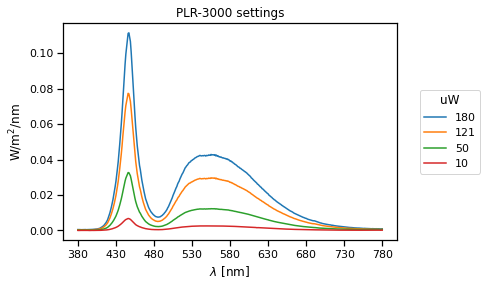

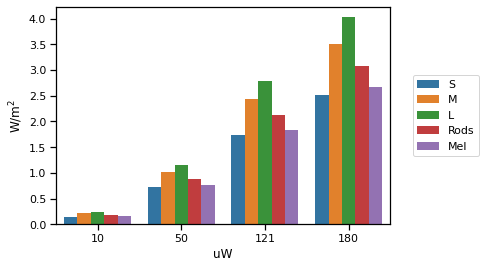

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

from pyplr.CIE import get_CIES026

# Load PLR-3000 data
plr3000 = pd.read_csv(
    '../data/PLR-3000_oo_calibrated_spectra.csv', index_col='uW')

# Plot SPDs
for i in plr3000.index:
    plr3000.loc[i].plot(label=i)
    plt.legend()
    plt.legend().set_title('uW')
    plt.ylabel('W/m$^2$/nm')
    plt.xlabel('$\lambda$ [nm]')
    plt.title('PLR-3000 settings')
    leg = plt.gca().legend(
        loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
    leg.set_title('uW')

# Plot a-opic irradiances
sss = get_CIES026(asdf=True)
sss = sss.fillna(0)
plr_3k_ao = w_m2_nm.dot(sss)
data = (plr_3k_ao.reset_index()
                 .melt(id_vars=['uW'], 
                       var_name=['aopic'], 
                       value_name='irradiance'))
f, ax = plt.subplots()
sns.barplot(
    data=data, x='uW', y='irradiance', hue='aopic', ax=ax)
ax.legend(
    loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
ax.set_ylabel('W/m$^2$');

Start by making the calibration context

380       381       382       383       384       385  \
led intensity                                                               
0   0          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    65         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    130        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    195        0.000026  0.000020  0.000023  0.000012  0.000033  0.000040   
    260        0.000147  0.000152  0.000158  0.000165  0.000155  0.000145   
...                 ...       ...       ...       ...       ...       ...   
9   3835       0.003778  0.004093  0.003488  0.003937  0.003176  0.003136   
    3900       0.003541  0.003839  0.003389  0.003721  0.003089  0.003009   
    3965       0.003653  0.003971  0.003476  0.004007  0.003401  0.003161   
    4030       0.003891  0.003956  0.003668  0.003874  0.003149  0.003184   
    4095       0.003615  0.004133  0.003597  0.004069  0.003316  0.003332   

                    386       387       388       389  ...       771  \
led intensity                                          ...             
0   0          0.000000  0.000000  0.000000  0.000000  ...  0.000000   
    65         0.000000  0.000000  0.000000  0.000000  ...  0.000000   
    130        0.000000  0.000000  0.000000  0.000000  ...  0.000000   
    195        0.000030  0.000032  0.000035  0.000028  ...  0.000015   
    260        0.000154  0.000141  0.000171  0.000167  ...  0.000083   
...                 ...       ...       ...       ...  ...       ...   
9   3835       0.003321  0.002896  0.003240  0.003787  ...  0.002468   
    3900       0.003012  0.002801  0.003189  0.003692  ...  0.002366   
    3965       0.003371  0.002836  0.003298  0.003639  ...  0.002297   
    4030       0.003271  0.002737  0.003217  0.003631  ...  0.002531   
    4095       0.003100  0.003010  0.003414  0.003781  ...  0.002344   

                    772       773       774       775       776       777  \
led intensity                                                               
0   0          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    65         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    130        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    195        0.000000  0.000008  0.000011  0.000000  0.000013  0.000012   
    260        0.000075  0.000087  0.000083  0.000072  0.000087  0.000085   
...                 ...       ...       ...       ...       ...       ...   
9   3835       0.002702  0.002610  0.002494  0.002934  0.002626  0.002619   
    3900       0.002733  0.002390  0.002299  0.002797  0.002622  0.002441   
    3965       0.002765  0.002593  0.002545  0.002785  0.002709  0.002760   
    4030       0.002757  0.002546  0.002377  0.002724  0.002598  0.002409   
    4095       0.002647  0.002569  0.002451  0.002913  0.002743  0.002612   

                    778       779       780  
led intensity                                
0   0          0.000013  0.000000  0.000000  
    65         0.000000  0.000000  0.000000  
    130        0.000000  0.000000  0.000000  
    195        0.000000  0.000017  0.000000  
    260        0.000008  0.000101  0.000082  
...                 ...       ...       ...  
9   3835       0.002212  0.002527  0.002909  
    3900       0.002099  0.002625  0.002919  
    3965       0.002129  0.002687  0.002693  
    4030       0.002036  0.002534  0.002836  
    4095       0.002170  0.002548  0.002757  

[640 rows x 401 columns]

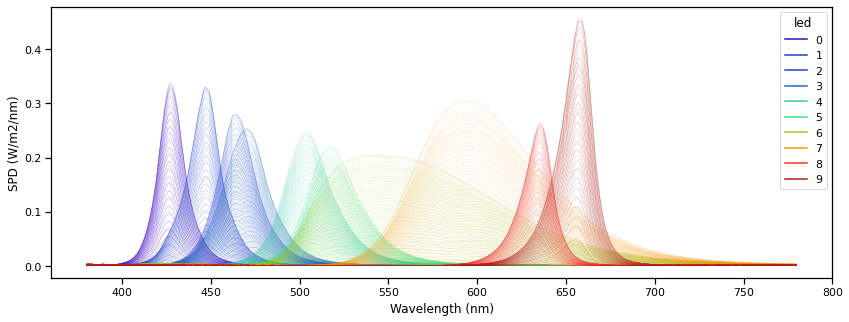

In [26]:
from pyplr.calibrate import CalibrationContext

cc = CalibrationContext(
    '../data/S2_corrected_oo_spectra.csv', binwidth=1)
_ = cc.plot_calibrated_spectra()
cc.data

Search for STLAB settings that match PLR-3000 for *a*-opic irradiance

In [33]:
import itertools

import numpy as np

# At least 5 LEDs are required here
num_leds = 5
use = ['L','M','S','Mel', 'Rods']
keep = []

# Loop through all possible combinations in 10 choose 5
for choose in itertools.combinations(range(10), num_leds):
    
    # Get the irradiances for each LED at maximum
    settings_to_irradiances = cc.aopic.loc[[(led, 4095) for led in choose], use]
    
    # Take the inverse
    irradiances_to_settings = np.linalg.inv(settings_to_irradiances)
    
    # Calculate the required input fraction for the chosen LEDs
    for mw in plr_3k_ao.index:
        plr_irradiances = plr_3k_ao.loc[mw, use].T
        settings = plr_irradiances.dot(irradiances_to_settings)

        # Keep the settings where all values are greater than 0 and less then 1
        if all(settings < 1) and all(settings > 0):
            keep.append((mw, choose, settings))
        
print('\n' + str(len(keep)) + ' settings found')


82 settings found


In [77]:
predicted

,380,381,382,383,384,385,386,387,388,389,...,771,772,773,774,775,776,777,778,779,780
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000123,0.0,0.0


In [74]:
settings = pd.DataFrame()
predicted = pd.DataFrame()
plr_mws = [10, 50, 121, 180]
idx=[]
for mw in plr_mws:
    vals = [val[1:] for val in keep if val[0] == mw]
    for k in vals:
        leds = k[0]
        intensities = np.round(k[1] * 4095).astype('int')
        spec = [0]*10
        for led, i in zip(leds, intensities):
            spec[led] = i
        pred = cc.predict_spd(spec)
        predicted = predicted.append(pred)
        settings = settings.append(spec) 
        idx.append(mw)
        
settings.reset_index(inplace=True, drop=True)
settings['mw'] = idx
predicted.reset_index(inplace=True, drop=True)
predicted['mw'] = idx

keeps = []
for mw in plr_mws:
    predmw = predicted[predicted.mw==mw]
    predmw = predmw[predmw.columns[:-1]]
    best = predmw.sub(w_m2_nm.loc[mw].to_numpy()).pow(2).sum(axis=1).idxmin()
    keeps.append(best)
    
optimal_predicted = predicted.loc[keeps].set_index('mw')
optimal_settings = settings.loc[keeps].set_index('mw')
optimal_settings


AttributeError: 'list' object has no attribute 'T'

NameError: name 'optimal_settings' is not defined

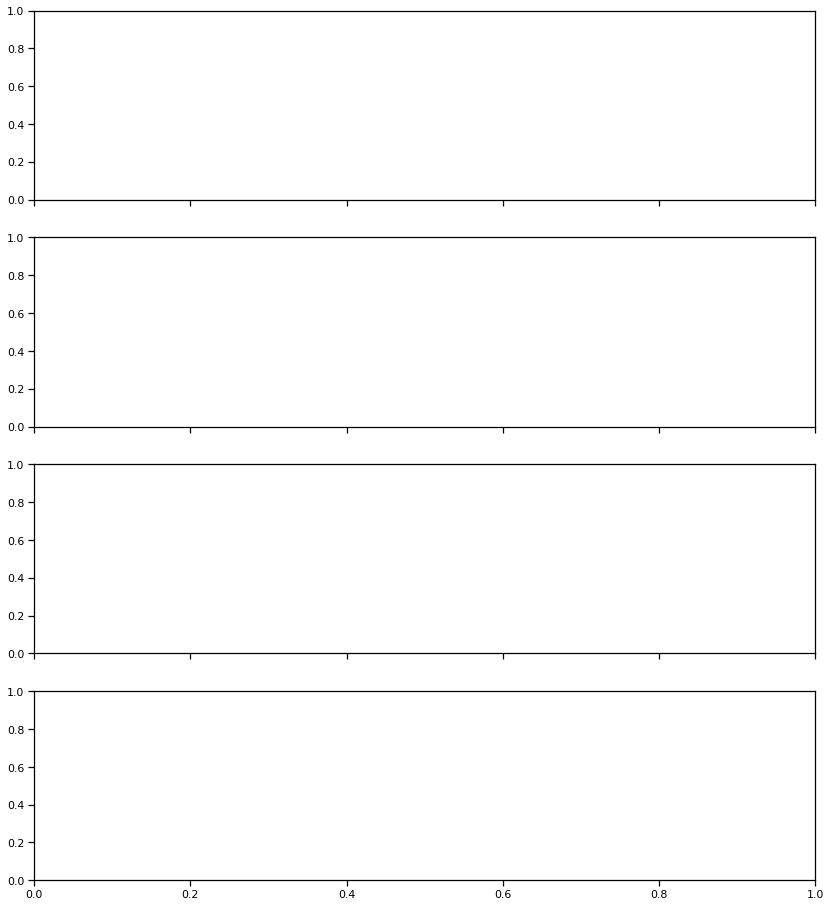

In [34]:
fig, axs = plt.subplots(nrows=4, sharex=True, figsize=(14,16))
for ax, mw in zip(axs, optimal_settings.index):
    w_m2_nm.loc[mw].plot(label='plr_3000: {} uW'.format(mw), ax=ax, color='k', linestyle='--')
    ax.plot(w_m2_nm.columns, optimal_predicted.loc[mw], label='optimal_stlab: ' + str(optimal_settings.loc[mw].to_list()), linestyle='--')
    ax.legend()
    ax.plot(w_m2_nm.columns, predicted.set_index('mw').loc[mw].T, lw=.3)
for ax in axs:
    ax.set_ylabel('W/m$^2$/nm')
    ax.set_xlabel('$\lambda$ [nm]')

In [125]:
from pyplr.stlab import pulse_protocol, video_file_to_dict
for mw, spec in optimal_settings.iterrows():
    print(row.to_list())
    pulse_protocol(pulse_spec=spec.to_list(),
                   pulse_duration=1000,
                   fname='PLR-3000-{}-mw'.format(mw))

[0, 1105, 143, 0, 0, 0, 740, 70, 0, 0]
"PLR-3000-10-mw.dsf" saved in the current working directory.
[0, 1105, 143, 0, 0, 0, 740, 70, 0, 0]
"PLR-3000-50-mw.dsf" saved in the current working directory.
[0, 1105, 143, 0, 0, 0, 740, 70, 0, 0]
"PLR-3000-121-mw.dsf" saved in the current working directory.
[0, 1105, 143, 0, 0, 0, 740, 70, 0, 0]
"PLR-3000-180-mw.dsf" saved in the current working directory.


In [124]:
vf = video_file_to_dict('PLR-3000-180-mw.dsf')
vf

{'header': {'version': 1,
  'model': 'VEGA10',
  'channels': 10,
  'spectracount': 4,
  'transitionsCount': 4,
  'fluxReference': 0,
  'repeats': 1},
 'metadata': {'creation_time': '2021-02-10 13:23:00.011513',
  'creator': 'jtm',
  'protocol': 'pulse',
  'pulse_spec': '[0, 1105, 143, 0, 0, 0, 740, 70, 0, 0]',
  'pulse_duration': '1000'},
 'spectra': [[0, 1105, 143, 0, 0, 0, 740, 70, 0, 0],
  [0, 1105, 143, 0, 0, 0, 740, 70, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 'transitions': [{'spectrum': 0, 'power': 100, 'time': 0, 'flags': 0},
  {'spectrum': 1, 'power': 100, 'time': 1000, 'flags': 0},
  {'spectrum': 2, 'power': 100, 'time': 1000, 'flags': 0},
  {'spectrum': 3, 'power': 100, 'time': 1100, 'flags': 0}]}